#### Imports

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

### Load Data & Model

In [2]:
outputs_path = Path("../outputs")
assets_path = Path("../data/assets")
factors_path = Path("../data/factors")

In [6]:
with open(outputs_path / "model_results.pkl", "rb") as f:
    results = pickle.load(f)

### Collect Metrics

In [7]:
evaluation_data = []

for ticker, models in results.items():
    capm_model = models["CAPM"]
    ff3_model = models["FF3"]
    
    evaluation_data.append({
        "Ticker": ticker,
        "CAPM_R2_adj": capm_model.rsquared_adj,
        "CAPM_AIC": capm_model.aic,
        "CAPM_BIC": capm_model.bic,
        "FF3_R2_adj": ff3_model.rsquared_adj,
        "FF3_AIC": ff3_model.aic,
        "FF3_BIC": ff3_model.bic,
    })

eval_df = pd.DataFrame(evaluation_data).set_index("Ticker")
eval_df

,CAPM_R2_adj,CAPM_AIC,CAPM_BIC,FF3_R2_adj,FF3_AIC,FF3_BIC
Ticker,,,,,,
AAPL,0.595785,-10496.799268,-10485.854267,0.649500,-10745.610448,-10723.720445
AMZN,0.450177,-9536.553961,-9525.608959,0.570504,-9969.002171,-9947.112168
JNJ,0.239117,-10951.494379,-10940.549377,0.301468,-11099.890373,-11078.000370
JPM,0.500623,-10237.057780,-10226.112779,0.742394,-11399.399285,-11377.509282
KO,0.318980,-11149.169796,-11138.224795,0.411092,-11402.794523,-11380.904520
META,0.379079,-8628.705776,-8617.760774,0.441873,-8814.247957,-8792.357954
MSFT,0.667859,-11039.019031,-11028.074029,0.767102,-11661.394904,-11639.504901
PFE,0.182123,-9902.506357,-9891.561356,0.210099,-9961.730717,-9939.840714
TSLA,0.253374,-6831.976699,-6821.031697,0.298089,-6938.611774,-6916.721771


#### Compare Metrics

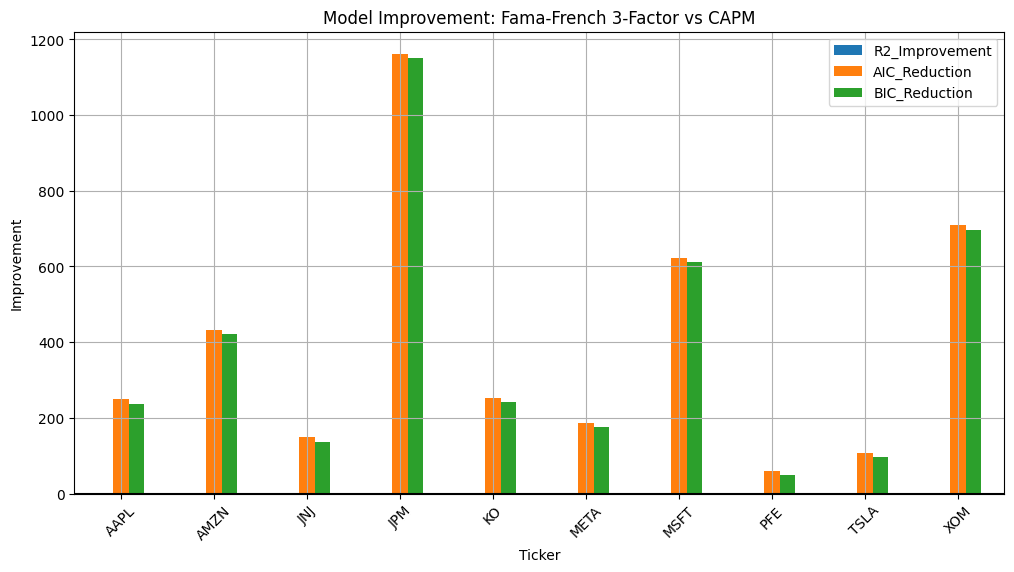

In [9]:
diff_df = eval_df.assign(
    R2_Improvement = eval_df["FF3_R2_adj"] - eval_df["CAPM_R2_adj"],
    AIC_Reduction = eval_df["CAPM_AIC"] - eval_df["FF3_AIC"],
    BIC_Reduction = eval_df["CAPM_BIC"] - eval_df["FF3_BIC"]
)
diff_df.sort_values("R2_Improvement", ascending=False)
diff_df[["R2_Improvement", "AIC_Reduction", "BIC_Reduction"]].plot(kind="bar", figsize=(12,6))
plt.title("Model Improvement: Fama-French 3-Factor vs CAPM")
plt.ylabel("Improvement")
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(0, color='black')
plt.show()
